This is code for a heterogenous wealth exchange model trying to measure mobility.  
Each agent has a different saving propensity, and we measure mobility as the change in an agent's weath in a certain(defined by user) time period.

This is analoous to find the relationship between the distribution of postiton and velocity of particles in an infinte box but with heterogenous particles, and long range exchange of energy. (We can add in short range exchange by contraining which two people exchange energy using a probability distribution based on difference of wealth) 

In this model we assumethe probability of 2 agents interacting is a uniform distribution.

This is analogous to the energy exchange between molecules in statistical mechanics.


Reference: https://arxiv.org/pdf/physics/0611245.pdf

In [25]:
from matplotlib import pyplot as plt
import math
import random
import numpy as np
import metpy.calc as calc
import pandas as pd



In [26]:
#All initializations
wealth=100.0
agents=200
iniwealth=np.zeros(agents)
finalwealth=np.zeros(agents)
trades_perperson=5000
wealthchange_per_time_step_per_agent=[]
variancewealthchange=[]
mean_wealth_change_per_time=[]
varianceper200trades=[]
numberoftradesperagent=np.zeros(agents)
finalwealth200=np.zeros(200)
iniwealth200=np.zeros(200)
inequality_everstep=[]#variance of distribution after every time step
inequality_200steps=[]#variance of distribution
journey_every_agent=np.zeros(agents)
mean_path_length_every_agent=np.zeros(agents)
variance_mean_path_length_over_time=[]
mean_path_length_avg_agent_over_time=[]



a=np.ones(agents)
a*=wealth
saving=np.random.rand(agents)
agent_timeseries_t=[] #will have trades_perperson

kappa=1-saving
eta=0#binary value that decides whether or not the trade happens
kappa
elements = [i for i in range(trades_perperson)]
totalvarianceeachtimestep=[]
total_wealth=np.sum(a)
weights=np.arange(1,agents+1,1)
wealthpercentile=np.copy(a)/total_wealth
np.sort(wealthpercentile)
gini_overtime=[] #0 is most equal meanwhile 1 is most unequal
gini_overtime.append((2*np.dot(wealthpercentile,weights)/agents)-1)   #gini_overtime.append(2*np.dot(wealthpercentile,weights)/agents) this is the lebesgue sum while we needed the reiman sum

gini_overtime #check gini index code


[0.0050000000000001155]

In [27]:
#Making sure that in every time period every agent has atleast one trade(on average 2)
for e in elements:
  iniwealth200=np.copy(a)
  for index,element in enumerate(a):
    agent_timeseries_t.append(np.copy(a))
    iniwealth=np.copy(a)
    
    j=random.randrange(0,agents,1)
    if(index==j):
       j-=1 
    epsilon=random.random()
    e2=random.random()
    
    numberoftradesperagent[index]+=1
    numberoftradesperagent[j]+=1
    delw=(((1-epsilon)*a[j])*kappa[j])-((epsilon*element)*kappa[index])
    a[index]+=delw
    a[j]-=delw
    journey_every_agent[index]+=abs(delw)
    journey_every_agent[j]+=abs(delw)  #There is inconsistency in mean path length every agent formula, improve it later
    if numberoftradesperagent[index]==1:
       mean_path_length_every_agent[index]=abs(delw)
    if numberoftradesperagent[j]==1:
       mean_path_length_every_agent[j]=abs(delw)
    if numberoftradesperagent[index]!=1 and numberoftradesperagent[j]!=1:
       mean_path_length_every_agent[index]=(mean_path_length_every_agent[index]+(abs(delw)/(numberoftradesperagent[index]-1)))*((numberoftradesperagent[index]-1)/numberoftradesperagent[index])
       mean_path_length_every_agent[j]=(mean_path_length_every_agent[j]+(abs(delw)/(numberoftradesperagent[j]-1)))*((numberoftradesperagent[j]-1)/numberoftradesperagent[j])
    mean_path_length_avg_agent_over_time.append(np.average(mean_path_length_every_agent))
    variance_mean_path_length_over_time.append(np.var(mean_path_length_every_agent))
    # Calculating gini index
    wealthpercentile=np.copy(a)/total_wealth
    wealthpercentile=np.sort(wealthpercentile)
    gini_overtime.append((2*np.dot(wealthpercentile,weights)/agents)-1)
    # end of gini index code
    finalwealth=np.copy(a)
    wealthchange_per_time_step_per_agent.append((finalwealth-iniwealth))
    mean_wealth_change_per_time.append(np.sum((finalwealth-iniwealth)))
    totalvarianceeachtimestep.append(np.sum((finalwealth-iniwealth)**2)/200.0)
    variancewealthchange.append(((finalwealth-iniwealth)**2))
    inequality_everstep.append(np.var(a))
  inequality_200steps.append(np.var(a))
  finalwealth200=np.copy(a)
  varianceper200trades.append(np.sum((finalwealth200-iniwealth200)**2)/200.0)


agent_timeseries_t


[array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 

The cell below is to give column names to the dataframes we make

In [36]:
#Calculating the various parameters associated with time series we are interested in

#agent_timeseries=pd.DataFrame(agent_timeseries_t).T
#agent_timeseries

agent_timeseries=pd.DataFrame(agent_timeseries_t)
variancewealthchangepertime=pd.DataFrame(variancewealthchange)
agent=np.full(200,'Agent ')
numbers=np.arange(0,200,1)
res = numbers.astype(str)
column_names = np.char.add(agent, res)
agent_timeseries.columns=column_names
variancewealthchangepertime.columns=column_names


In [37]:
agent_timeseries

Agent 0     Agent 1     Agent 2     Agent 3     Agent 4  \
0       100.000000  100.000000  100.000000  100.000000  100.000000   
1       132.651650  100.000000  100.000000  100.000000  100.000000   
2       132.651650   19.602536  100.000000  100.000000  100.000000   
3       132.651650   19.602536  120.993066  100.000000  100.000000   
4       132.651650   19.602536  120.993066   82.116185  100.000000   
...            ...         ...         ...         ...         ...   
999995  273.921192    8.305034   24.430017   29.120514    2.040071   
999996  273.921192    8.305034   24.430017   29.120514    2.040071   
999997  273.921192    8.305034   24.430017   29.120514    2.040071   
999998  273.921192    8.305034   24.430017   29.120514    2.040071   
999999  273.921192    8.305034   24.430017   29.120514    2.040071   

           Agent 5     Agent 6     Agent 7     Agent 8     Agent 9  ...  \
0       100.000000  100.000000  100.000000  100.000000  100.000000  ...   
1       100.000000  100.000000  100.000000  100.000000  100.000000  ...   
2       100.000000  100.000000  100.000000  100.000000  100.000000  ...   
3       100.000000  100.000000  100.000000  100.000000  100.000000  ...   
4       100.000000  100.000000  100.000000  100.000000  100.000000  ...   
...            ...         ...         ...         ...         ...  ...   
999995    6.654111   45.490034   30.232202   18.510026   20.224401  ...   
999996    6.654111   45.490034   30.232202   18.510026   20.224401  ...   
999997    6.654111   45.490034   30.232202   18.510026   20.224401  ...   
999998    6.654111   45.490034   30.232202   18.510026   20.224401  ...   
999999    6.654111   45.490034   30.232202   18.510026   20.224401  ...   

         Agent 190   Agent 191   Agent 192  Agent 193   Agent 194   Agent 195  \
0       100.000000  100.000000  100.000000  100.00000  100.000000  100.000000   
1       100.000000  100.000000  100.000000  100.00000  100.000000  100.000000   
2       100.000000  100.000000  100.000000  100.00000  100.000000  100.000000   
3       100.000000  100.000000  100.000000  100.00000  100.000000  100.000000   
4       100.000000  100.000000  100.000000  100.00000  100.000000  100.000000   
...            ...         ...         ...        ...         ...         ...   
999995   18.283762   40.133985  106.628342   59.26113    6.380909  108.315980   
999996   18.283762   40.133985  106.628342   59.26113    6.380909   95.021381   
999997   18.283762   40.133985  106.628342   59.26113    6.380909   95.021381   
999998   18.283762   40.133985  106.628342   59.26113    6.380909   95.021381   
999999   18.283762   40.133985  106.628342   59.26113    6.380909   95.021381   

         Agent 196   Agent 197  Agent 198   Agent 199  
0       100.000000  100.000000  100.00000  100.000000  
1        67.348350  100.000000  100.00000  100.000000  
2        67.348350  100.000000  100.00000  100.000000  
3        67.348350  100.000000  100.00000  100.000000  
4        67.348350  100.000000  100.00000  100.000000  
...            ...         ...        ...         ...  
999995   11.730770   15.452777  135.23445   32.612387  
999996   11.730770   15.452777  135.23445   32.612387  
999997    5.960456   15.452777  135.23445   32.612387  
999998    5.960456   15.632171  135.23445   32.612387  
999999    5.960456   15.632171  129.96821   32.612387  

[1000000 rows x 200 columns]

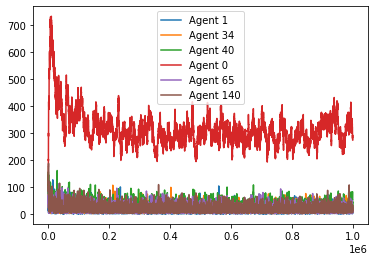

In [38]:
#Agent timeseries
%matplotlib inline
agent_timeseries['Agent 1'].plot(legend=True)
agent_timeseries['Agent 34'].plot(legend=True)
agent_timeseries['Agent 40'].plot(legend=True)
agent_timeseries['Agent 0'].plot(legend=True)
agent_timeseries['Agent 65'].plot(legend=True)
agent_timeseries['Agent 140'].plot(legend=True)
plt.title('Wealth of agents')
plt.show()

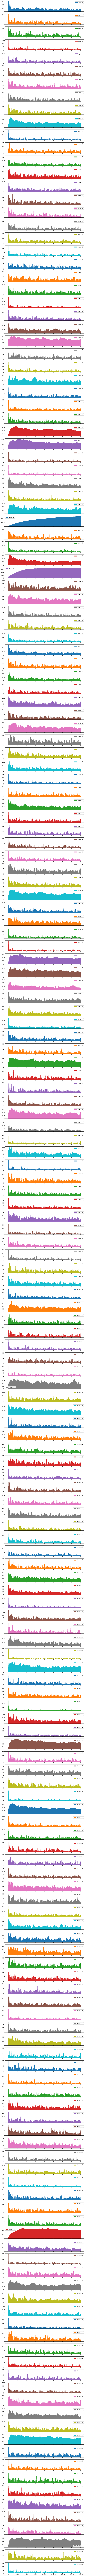

In [91]:
%matplotlib inline
agent_timeseries.plot.area(figsize=(12, 400), subplots=True)
plt.show()

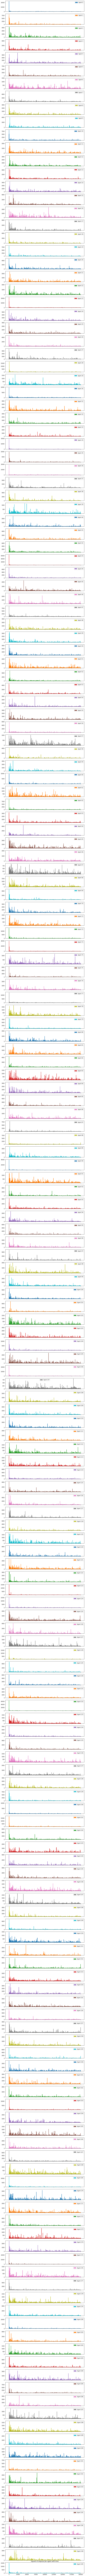

In [88]:
%matplotlib inline 
variancewealthchangepertime.plot.area(figsize=(12, 400), subplots=True)
plt.title('Square of stepsize per agent with time')
plt.show()#plots of step size for each agent

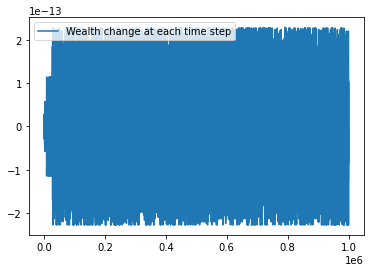

In [28]:
%matplotlib inline
plt.plot(mean_wealth_change_per_time,label='Wealth change at each time step')

plt.legend()
plt.show()

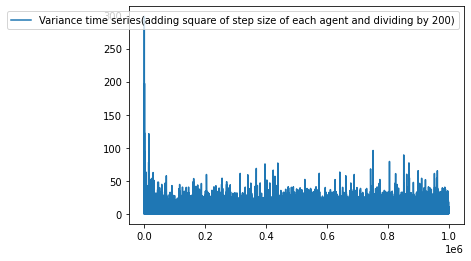

In [29]:
%matplotlib inline
plt.plot((totalvarianceeachtimestep),label='Variance time series(adding square of step size of each agent and dividing by 200)')#I think data will be clear if we do it for every 
plt.legend()
plt.show()

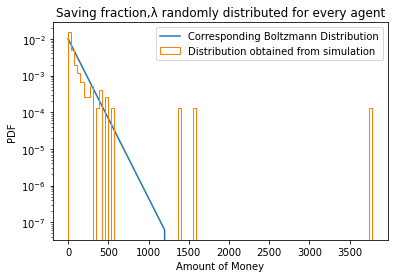

In [30]:
%matplotlib inline
c=np.zeros(15000)
d=np.zeros(15000)
for i in range(12000):
    c[i]=0.1*i
    d[i]=0.01*math.exp(-0.01*c[i])

plt.plot(c,d,label='Corresponding Boltzmann Distribution')
plt.xlabel('Amount of Money')
plt.ylabel('PDF')
plt.hist(a,bins=100,histtype='step',density= True,cumulative=False,log=True,label='Distribution obtained from simulation')#,bins=1000,range=(0,0.0001),density= False,cumulative= False,histtype='step', log= False)
plt.legend()
plt.title('Saving fraction,λ randomly distributed for every agent')
plt.show()

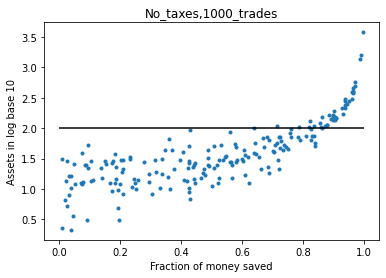

In [31]:
%matplotlib inline
plt.scatter(saving,np.log(a)/math.log(10),marker='.')
plt.hlines(2,0,1,color='black')
plt.ylabel('Assets in log base 10')
plt.xlabel('Fraction of money saved')
plt.title('No_taxes,1000_trades')
plt.show()

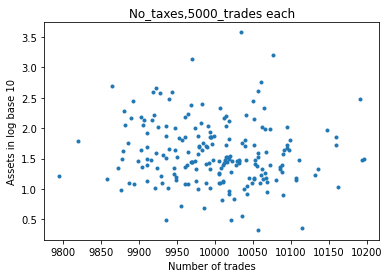

In [32]:
%matplotlib inline
plt.scatter(numberoftradesperagent,np.log(a)/math.log(10),marker='.')
plt.ylabel('Assets in log base 10')
plt.xlabel('Number of trades')
plt.title('No_taxes,5000_trades each')
plt.show()


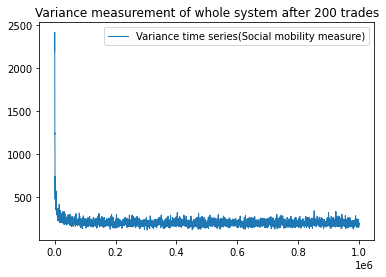

In [33]:
%matplotlib inline
plt.plot((np.arange(0,trades_perperson,1)*200),(varianceper200trades),linewidth='1',label='Variance time series(Social mobility measure)')#I think data will be clear if we do it for every 
#plt.plot((totalvarianceeachtimestep),linewidth=0.5,label='Social mobility  time series(adding square of step size of each agent and dividing by 200)')
# plt.plot(inequality_200steps,label="Variance of distrbution after every 200 trade(Inequality measure)")
plt.legend()
plt.title('Variance measurement of whole system after 200 trades')
plt.show()

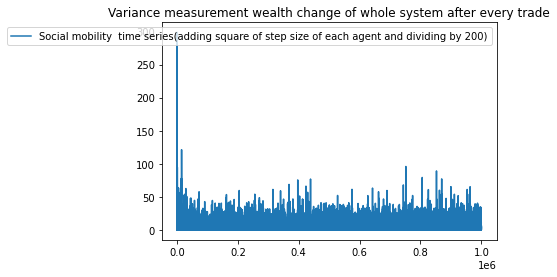

In [34]:
%matplotlib inline
plt.plot((totalvarianceeachtimestep),label='Social mobility  time series(adding square of step size of each agent and dividing by 200)')#I think data will be clear if we do it for every 
#plt.plot(inequality_everstep,label="Variance of income distrbution after every 200 trade(income)")
plt.legend()
plt.title('Variance measurement wealth change of whole system after every trade')
plt.show()

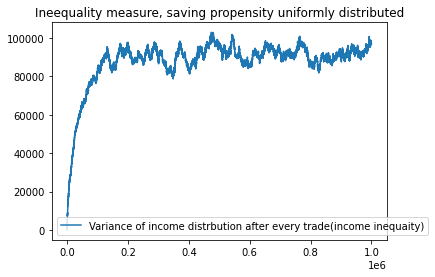

In [35]:
%matplotlib inline
plt.plot(inequality_everstep,label="Variance of income distrbution after every trade(income inequaity)")
#plt.plot((np.arange(0,trades_perperson,1)*200),inequality_200steps,label="Variance of distrbution after every 200 trade(Inequality measure)")
plt.legend()
plt.title('Ineequality measure, saving propensity uniformly distributed')
plt.show()

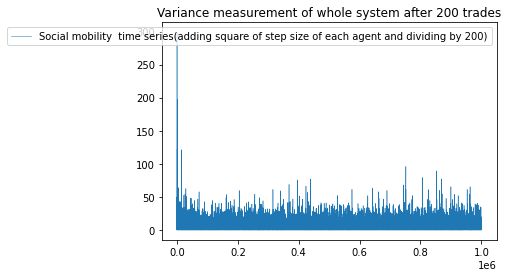

In [36]:
%matplotlib inline
plt.plot((totalvarianceeachtimestep),linewidth=0.5,label='Social mobility  time series(adding square of step size of each agent and dividing by 200)')
# plt.plot(inequality_200steps,label="Variance of distrbution after every 200 trade(Inequality measure)")
plt.legend()
plt.title('Variance measurement of whole system after 200 trades')
plt.show()

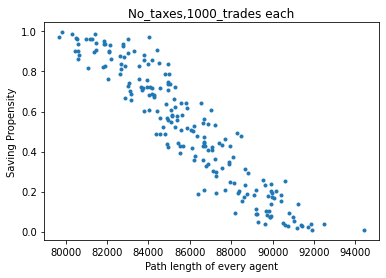

In [37]:
%matplotlib inline

plt.scatter(journey_every_agent,saving,marker='.')
plt.ylabel('Saving Propensity')
plt.xlabel('Path length of every agent')
plt.title('No_taxes,1000_trades each')
plt.show()



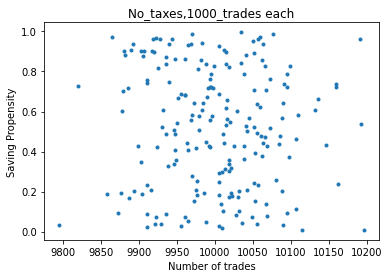

In [38]:
%matplotlib inline
plt.scatter(numberoftradesperagent,saving,marker='.')
plt.ylabel('Saving Propensity')
plt.xlabel('Number of trades')
plt.title('No_taxes,1000_trades each')
plt.show()


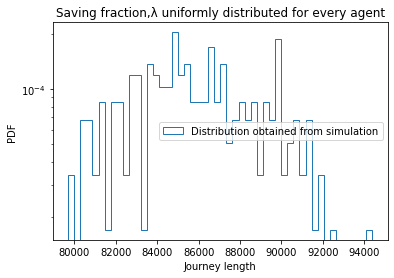

In [39]:
%matplotlib inline

plt.xlabel('Journey length')
plt.ylabel('PDF')
plt.hist(journey_every_agent,bins=50,histtype='step',density= True,cumulative=False,log=True,label='Distribution obtained from simulation')#,bins=1000,range=(0,0.0001),density= False,cumulative= False,histtype='step', log= False)
plt.legend()
plt.title('Saving fraction,λ uniformly distributed for every agent')
plt.show()

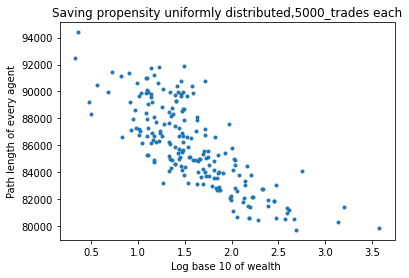

In [40]:
%matplotlib inline

plt.scatter(np.log(a)/math.log(10),journey_every_agent,marker='.')
plt.xlabel('Log base 10 of wealth ')
plt.ylabel('Path length of every agent')
plt.title('Saving propensity uniformly distributed,5000_trades each')
plt.show()


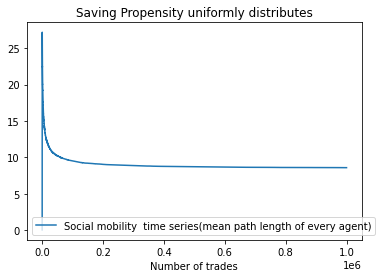

In [41]:
%matplotlib inline
plt.plot((mean_path_length_avg_agent_over_time),label='Social mobility  time series(mean path length of every agent)')#I think data will be clear if we do it for every 
#plt.plot(inequality_everstep,label="Variance of income distrbution after every 200 trade(income)")
plt.legend()
plt.xlabel('Number of trades')
plt.title('Saving Propensity uniformly distributes')
plt.show()

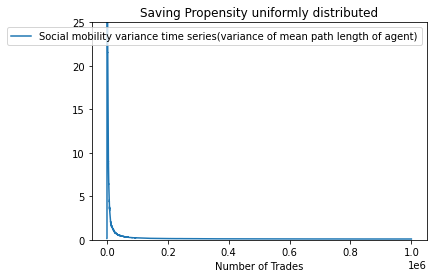

In [42]:
%matplotlib inline
plt.plot((variance_mean_path_length_over_time),label='Social mobility variance time series(variance of mean path length of agent)')#I think data will be clear if we do it for every 
#plt.plot(inequality_everstep,label="Variance of income distrbution after every 200 trade(income)")
plt.legend()
plt.xlabel('Number of Trades')
plt.ylim(0,25)
plt.title('Saving Propensity uniformly distributed')
plt.show()

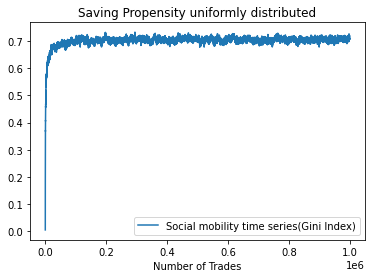

In [43]:
%matplotlib inline

plt.plot((gini_overtime),label='Social mobility time series(Gini Index)')#I think data will be clear if we do it for every 
#plt.plot(inequality_everstep,label="Variance of income distrbution after every 200 trade(income)")
plt.legend()
plt.xlabel('Number of Trades')
plt.title('Saving Propensity uniformly distributed')
plt.show()

In [22]:
wealthpercentile

array([6.83564670e-05, 6.99343076e-05, 1.27800490e-04, 1.39446777e-04,
       1.51013869e-04, 1.56724156e-04, 1.70123847e-04, 1.70681066e-04,
       1.79198064e-04, 2.00916885e-04, 2.15474657e-04, 2.17411729e-04,
       2.36523436e-04, 2.41115202e-04, 2.47936221e-04, 2.61188973e-04,
       2.72267861e-04, 2.76245688e-04, 2.94983898e-04, 3.02244198e-04,
       3.06247395e-04, 3.18056614e-04, 3.26877194e-04, 3.36892264e-04,
       3.43754852e-04, 3.46909726e-04, 3.49565492e-04, 3.57181106e-04,
       3.57842241e-04, 3.59383526e-04, 3.66372909e-04, 3.71336696e-04,
       3.76433206e-04, 3.80099067e-04, 3.93557862e-04, 3.94973687e-04,
       3.99787537e-04, 4.13207691e-04, 4.13686462e-04, 4.13715952e-04,
       4.18940838e-04, 4.25982777e-04, 4.29860921e-04, 4.32783491e-04,
       4.40584218e-04, 4.42789217e-04, 4.50417803e-04, 4.57991292e-04,
       4.58353784e-04, 4.60459959e-04, 4.61330946e-04, 4.70310139e-04,
       4.80472243e-04, 4.92551786e-04, 5.03139377e-04, 5.06589190e-04,
      